In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import math

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
from pydataset import data

1. Load the tips dataset from either pydataset or seaborn.

In [22]:
# grab our dataframe
df = data('tips')

In [23]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
df.shape

(244, 7)

In [25]:
train_val, test = train_test_split(df, train_size=0.8, random_state=1349)
train, val = train_test_split(train_val, train_size=0.7, random_state=1349)

In [26]:
train.shape, val.shape, test.shape

((136, 7), (59, 7), (49, 7))

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:

from sklearn.linear_model import LinearRegression

(assuming X and y are already defined)
 
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

Modify and add to the code above as necessary for it to work with the tips dataset.

In [29]:
train.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [28]:
X_train, y_train = train.drop(columns='tip'), train[['tip']]

In [30]:
# specific instruction: to use single independent variable total_bill as X

In [31]:
X_train[['total_bill']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 52 to 155
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  136 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [32]:
# follow our sklearn object creation and training process:
# make the thing
lm = LinearRegression(normalize=True)
# fit the thing
lm.fit(X_train[['total_bill']],y_train.tip)
# use the thing
yhat = lm.predict(X_train[['total_bill']])


In [33]:
type(yhat)

numpy.ndarray

3. Plot the residuals for the linear regression model that you made.

In [35]:
y_train['yhat'] = yhat
y_train['lm_resid'] = y_train.tip - y_train.yhat

In [36]:
y_train.head()

,tip,yhat,lm_resid
52,2.60,2.077028,0.522972
47,5.00,3.269021,1.730979
108,4.29,3.566520,0.723480
87,2.00,2.350567,-0.350567
59,1.76,2.171868,-0.411868


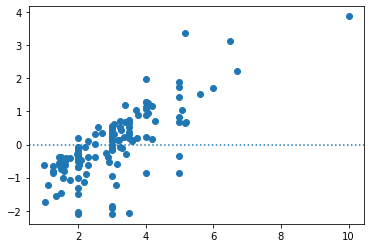

In [40]:
plt.scatter(y_train.tip, y_train.lm_resid)
plt.axhline(0, ls=':')
plt.show()

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

7. What is the amount of variance explained in your model?

8. Is your model better than the baseline model?

In [41]:
y_train.head()

,tip,yhat,lm_resid
52,2.60,2.077028,0.522972
47,5.00,3.269021,1.730979
108,4.29,3.566520,0.723480
87,2.00,2.350567,-0.350567
59,1.76,2.171868,-0.411868


In [42]:
baseline_mean = y_train.tip.mean()
baseline_median = y_train.tip.median()

In [43]:
baseline_mean, baseline_median

(2.9930882352941177, 3.0)

In [45]:
y_train['baseline_mean'] = baseline_mean
y_train['baseline_median'] = baseline_median

In [47]:
rmse_mean = mean_squared_error(y_train.tip, y_train.baseline_mean, squared=False)

In [48]:
rmse_median = mean_squared_error(y_train.tip, y_train.baseline_median, squared=False)

In [49]:
rmse_mean, rmse_median

(1.3410605519435872, 1.3410783632847814)

In [50]:
# we select the lowest value to run with for our baseline
# rmse_mean wins in this regard, this will be our baseline

In [52]:
rmse_lm1 = mean_squared_error(y_train.tip, y_train.yhat, squared=False)

In [53]:
rmse_lm1

1.0172229554378807

In [54]:
if rmse_lm1 < rmse_mean:
    print(f'We have a lower root mean squared error on our first\n linear model compared to our baseline\n {rmse_mean} >= {rmse_lm1}')

We have a lower root mean squared error on our first
 linear model compared to our baseline
 1.3410605519435872 >= 1.0172229554378807


In [56]:
r2_score(y_train.tip, y_train.yhat)

0.4246454802078823

9. Create a file named evaluate.py that contains the following functions.

    plot_residuals(y, yhat): creates a residual plot
    regression_errors(y, yhat): returns the following values:
        sum of squared errors (SSE)
        explained sum of squares (ESS)
        total sum of squares (TSS)
        mean squared error (MSE)
        root mean squared error (RMSE)
    baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
    better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

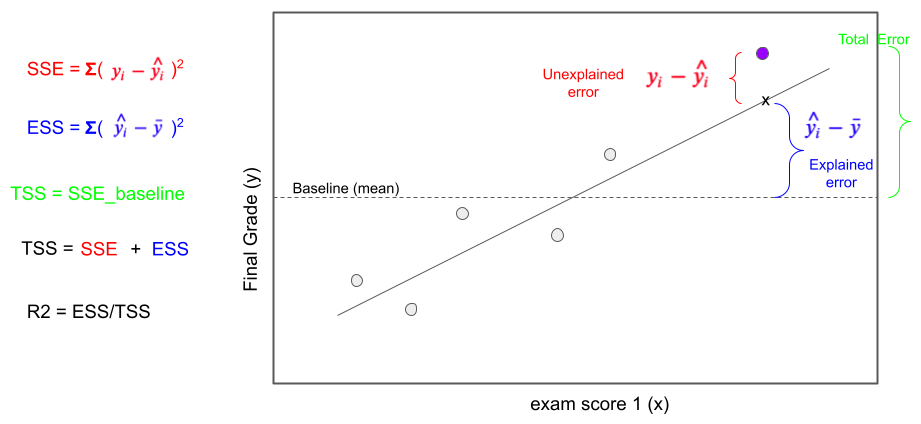

In [57]:
def residuals(actual, predicted):
    '''
    ∆(y,yhat)
    '''
    return actual - predicted

def sse(actual, predicted):
    '''
    sum of squared error
    '''
    return (residuals(actual, predicted) ** 2).sum()

def mse(actual, predicted):
    '''
    mean squared error
    '''
    n = actual.shape[0]
    return sse(actual, predicted) / n

def rmse(actual, predicted):
    '''
    root mean squared error
    '''
    return math.sqrt(mse(actual, predicted))

def ess(actual, predicted):
    '''
    explained sum of squared error
    '''
    return ((predicted - actual.mean()) ** 2).sum()

def tss(actual):
    '''
    total sum of squared error
    '''
    return ((actual - actual.mean()) ** 2).sum()

def r2_score(actual, predicted):
    '''
    explained variance
    '''
    return ess(actual, predicted) / tss(actual)

In [58]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

def regression_errors(actual, predicted):
    return pd.Series({
        'sse': sse(actual, predicted),
        'ess': ess(actual, predicted),
        'tss': tss(actual),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
        'r2': r2_score(actual, predicted),
    })

def baseline_mean_errors(actual):
    predicted = actual.mean()
    return {
        'sse': sse(actual, predicted),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    }

def better_than_baseline(actual, predicted):
    sse_baseline = sse(actual, actual.mean())
    sse_model = sse(actual, predicted)
    return sse_model < sse_baseline

In [59]:
regression_errors(y_train.tip, y_train.yhat)

sse     140.724986
ess     103.863317
tss     244.588303
mse       1.034743
rmse      1.017223
r2        0.424645
dtype: float64

In [60]:
better_than_baseline(y_train.tip, y_train.yhat)

True

10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

### mpg

In [62]:
# grab mpg from pydataset
mpg = data('mpg')

In [63]:
# chain create the thing then fit the thing
# specify x as displacement, y as highway milage
model = LinearRegression().fit(mpg[['displ']], mpg.hwy)

In [64]:
actual = mpg.hwy # y
predicted = model.predict(mpg[['displ']]) # yhat

In [65]:
regression_errors(actual, predicted)

sse     3413.829009
ess     4847.833384
tss     8261.662393
mse       14.589013
rmse       3.819557
r2         0.586787
dtype: float64

In [66]:
better_than_baseline(actual, predicted)

True

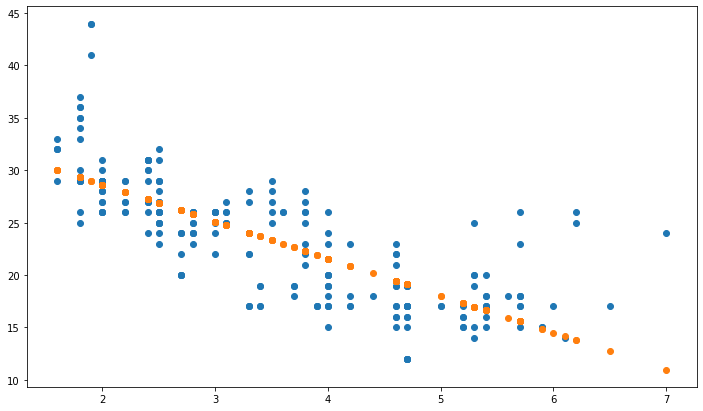

In [67]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(mpg.displ, mpg.hwy, label='actual')
ax.scatter(mpg.displ, predicted, label='prediction')

Sidenote: visualizing residuals w/ multiple independent variables

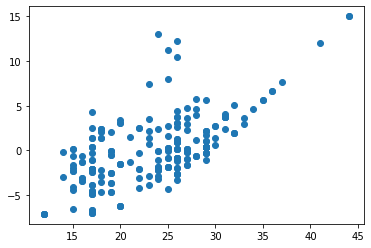

In [68]:
plt.scatter(mpg.hwy, actual - predicted)

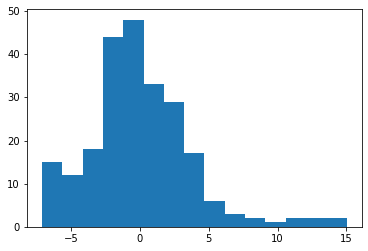

In [70]:
plt.hist(actual - predicted, bins=15)
plt.show()

In [ ]:
# takeaways:
# we have some trend of error and a fair but not excellent r^2
# vaguely normal but tailed distribution of residuals
# next steps:
# investigate what could correlate with engine displacement
# investigate usage of other features
# investigate combination of displacement with any other independent feature
# do we need separate models for a differnt class of vehicle